<a href="https://colab.research.google.com/github/Prerna99-star/Customer-Recommendation-using--Dimentionality-Reduction/blob/master/KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(dataset)
print(X)
print(y)


      User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]
[[1.90e+01 1.90e+04]
 [3.50e+01 2.00e+04]
 [2.60e+01 4.30e+04]
 [2.70e+01 5.70e+04]
 [1.90e+01 7.60e+04]
 [2.70e+01 5.80e+04]
 [2.70e+01 8.40e+04]
 [3.20e+01 1.50e+05]
 [2.50e+01 3.30e+04]
 [3.50e+01 6.50e+04]
 [2.60e+01 8.00e+04]
 [2.60e+01 5.20e+04]
 [2.00e+01 8.60e+04]
 [3.20e+01 1.80e+04]
 [1.80e+01

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.fit_transform(X_test)
print(X_train)
print(X_test)


[[ 5.72744226e-02  6.24922807e-01]
 [ 2.98039307e-01 -5.51069360e-01]
 [-3.27976660e-01  4.20258944e-01]
 [ 4.01548277e-01 -5.35102802e-01]
 [ 3.75772744e-01  3.97751670e-01]
 [ 6.42311009e-01 -1.10617361e-01]
 [-2.56837573e-01  4.81210460e-01]
 [-2.94482629e-01  3.46410210e-01]
 [-4.31908142e-01  2.99204966e-01]
 [-3.86586082e-01  2.06873996e-01]
 [-3.21858102e-01  1.95600303e-01]
 [-4.75084810e-01  2.32980852e-01]
 [ 5.50313474e-02  3.54497244e-01]
 [ 2.32890100e-01  6.30465977e-01]
 [ 4.33616862e-01  2.04540417e-01]
 [ 3.83876726e-01  4.82196197e-01]
 [ 6.48954007e-01 -4.19483401e-01]
 [-1.96271810e-01 -3.79585721e-01]
 [ 3.66579350e-01  2.54812085e-01]
 [ 2.36781120e-01  6.24132097e-01]
 [-2.76582419e-01 -2.32375547e-01]
 [ 5.35407237e-01 -1.24159987e-01]
 [ 3.87166412e-01 -4.05416881e-01]
 [ 3.98244122e-01 -2.95445650e-01]
 [-7.09411502e-02  5.77180935e-01]
 [-4.55071961e-01  1.78385332e-01]
 [ 2.73832301e-01  6.17261654e-01]
 [ 6.54747431e-01 -3.86564786e-01]
 [ 3.98664031e-01 -4

In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0]


In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[32 36]
 [31  1]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


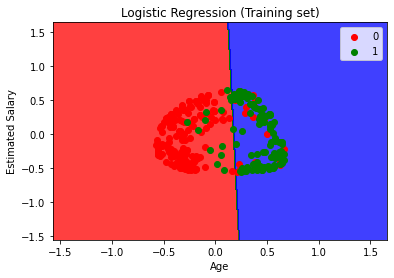

In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


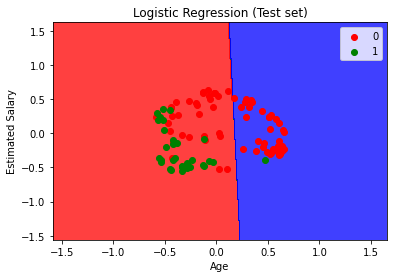

In [17]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
